# Econometrics Programming Language

# R/Stata

You can choose either R or Stata as your main language for this course. They are good to use because they have many canned econometrics packages. 

You can purchase a Stata software [here](https://www.stata.com). Stata is especially fast for standard econometrics routines, e.g. OLS, IV, Probit, etc., because these methods have been optimized by underlying binary codes. Writing your own methods using Stata would be a little bit annoying.

R is famous for its up-to-date econometrics packages (it is said that every new statistics paper will be published with an R package), its powerful ploting package (ggplot), and after all, it is totally free. You can download and install R [here](https://www.r-project.org). If you decide to use R as your canned language, [RStudio](https://www.rstudio.com/products/rstudio/) would be *the IDE* that you want to use. 

## Python

We use Python as our script language. Python is a very flexible and easy-to-read language. If you want to use Python in this course and future econometrics research, you should have a look at the scientific calculation packages: NumPy, SciPy, Pandas, and StatsModels. [Anaconda](https://www.anaconda.com) is a Python Data Science Platform that has wrapped most of the useful packages. It makes things simple to just install anaconda, than building Python environment by yourself.

*Important*: Do install Python 3.x, *NOT* Python 2.7.

# Estimating Conditional Average Treatment Effect

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

Assume the outcome random variable $Y$ has the functional form 

$$Y(X_1, X_2, \omega) = 0.1 X_1 + 0.2 X_2 - \omega,$$
and we want to get the conditional average treatment effect from $X_1$ being $x_1$ to $x_1^\prime$ given $X_2 = x_2$, which is

$$
E \left [Y(x_1, X_2, \omega) - Y(x_1 ^ \prime, X_2, \omega) \mid X_2 = x_2 \right ] = 
E \left [Y(x_1, X_2, \omega) \mid X_2 = x_2 \right ] - \left [Y(x_1 ^ \prime, X_2, \omega) \mid X_2 = x_2 \right ]
$$

Let us consider a special case where $X_1$, $X_2$, and $w_1$ are all discrete random variables. (If they are continuous variables, then we have to use some techinques rather than just using conditional means to get the ATE, e.g. kernel density regression).

$$
\Pr (X_1 = 1) = 0.4, \Pr (X_1 = 2) = 0.6 \\
\Pr (X_2 = 0) = \Pr (X_2 = 1) = 0.5 \\
\omega = X_1 ^ 2 + c, \Pr (c = -1) = \Pr (c = 1) = 0.5
$$

Here, we assume $X_2$ is independent random variable with both $X_1$ and $\omega$ for simplicity. You could try the case with $X_2$ being correlated with $X_1$ and $\omega$, and the conclusion should be unaffected.

Knowing the functional form of $Y(X_1, X_2, \omega)$, we know the ATE of changing $X_1$ from $x_1 = 1$ to $x_1^\prime = 2$ is $0.1$ given any $X_2$. 

### data generating

In [3]:
# set seed
np.random.seed(1234)

N = 1000000 # sample size

# X1
X1 = np.ones(N, dtype=np.int)
X1[np.random.random(N) > 0.4] = 2

# X2
X2 = np.ones(N, dtype=np.int)
X2[np.random.random(N) > 0.5] = 0

# ω
c = np.ones(N, dtype=np.int)
c[np.random.random(N) > 0.5] = -1
ω = X1**2 + c

In [4]:
# Y
Y = 0.1 * X1 + 0.2 * X2 - ω

In [5]:
x1, x1_prime = 1, 2
x2 = 1

$E[Y(X_1,X_2,ω)∣X_1 = x_1,X_2 = x_2]$

In [6]:
mean1 = np.mean(Y[(X1 == x1) & (X2 == x2)])
mean1

-0.6994701430613732

(Because $E[Y(1,2,1^2+c)∣X_1 = 1,X_2 = 2] = 0.1 + 0.2 - 1 - E[c∣X_1 = 1,X_2 = 2] = -0.7.$)

$E[Y(X_1,X_2,ω)∣X_1 = x_1^\prime,X_2 = x_2]$

In [7]:
mean2 = np.mean(Y[(X1 == x1_prime) & (X2 == x2)])
mean2

-3.600773302401235

(Because $E[Y(1,2,2^2+c)∣X_1 = 2,X_2 = 2] = 0.2 + 0.2 - 4 - E[c∣X_1 = 1,X_2 = 2] = -3.6.$)

In [8]:
mean2 - mean1

-2.9013031593398617

The reason is because by conditioning on $X_1$, we are partitioning the sample into different groups. The distribution of $ω$ is changed.

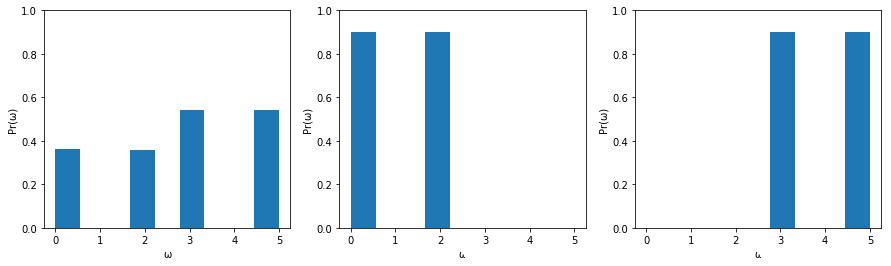

In [9]:
plt.figure(figsize = (15, 4))
ωs = [ω[X2 == x2], ω[(X1 == x1) & (X2 == x2)], ω[(X1 == x1_prime) & (X2 == x2)]]
bins = np.linspace(0., 5., 10)
for i, ω_plot in enumerate(ωs):
    plt.subplot(1, 3, i+1)
    plt.hist(ω_plot, bins=bins, density=True)
    plt.ylim([0, 1])
    plt.xlabel("ω")
    plt.ylabel("Pr(ω)")

The conditional average treatment effect is not recovered.

Now let's assume $X_1$ and $ω$ are independent given $X_2$: we change the distribution of ω to be

$$
\Pr(ω=0) = \Pr(ω=2) = 0.2 \\
\Pr(ω=3) = \Pr(ω=5) = 0.3
$$

so that the marginal distribution of $ω$ keeps the same.

In [10]:
prob = np.random.random(N)
ω = np.zeros(N, dtype=np.int)
ω[(prob > 0.2) & (prob <= 0.4)] = 2
ω[(prob > 0.4) & (prob <= 0.7)] = 3
ω[prob > 0.7] = 5

Y = 0.1 * X1 + 0.2 * X2 - ω

In [11]:
mean1 = np.mean(Y[(X1 == x1) & (X2 == x2)])
mean1

-2.4981095104321844

In [12]:
mean2 = np.mean(Y[(X1 == x1_prime) & (X2 == x2)])
mean2

-2.4010812900817293

In [13]:
mean2 - mean1

0.09702822035045511

The conditional ATE is recovered.

The distribution of $ω$ is unchanged by conditioning on $X_1$, because the conditional independence assumption holds now.

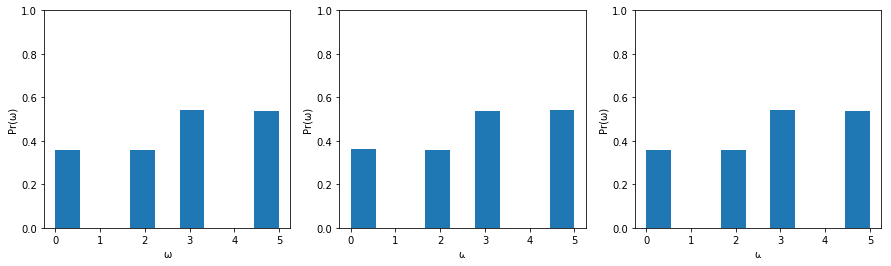

In [14]:
plt.figure(figsize = (15, 4))
ωs = [ω[X2 == x2], ω[(X1 == x1) & (X2 == x2)], ω[(X1 == x1_prime) & (X2 == x2)]]
bins = np.linspace(0., 5., 10)
for i, ω_plot in enumerate(ωs):
    plt.subplot(1, 3, i+1)
    plt.hist(ω_plot, bins=bins, density=True)
    plt.ylim([0, 1])
    plt.xlabel("ω")
    plt.ylabel("Pr(ω)")